In [1]:
import numpy as np
import pandas as pd
import os
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import time
import pygmo as pg

In [2]:
dataset = pd.read_csv("Rosenbrock_dataset_data.csv")
Rosenbrock_dataset = dataset["val"].tolist()

In [3]:
D = 50
bias = 390
lower_bound = -100
upper_bound = 100
popsize = 300

In [4]:
def function(x, data, dim, f_bias):
    F = 0
    z = np.empty(dim)
    for i in range(dim - 1):
        z[i] = x[i] - data[i] + 1
    for i in range (dim - 2):
        F += 100 * ((z[i]**2 - z[i + 1])**2) + (z[i] - 1)**2
    res = F + f_bias
    return res

In [5]:
class RB:
    def __init__(self, dim, lower_bound, upper_bound, optim, bias):
        self.dim = dim
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.optim = optim
        self.bias = bias

    def fitness(self, x):
        res = [function(x, self.optim, self.dim, self.bias)]
        return res

    def get_bounds(self):
        xmin = self.lower_bound * np.ones(self.dim)
        xmax = self.upper_bound * np.ones(self.dim)
        return xmin, xmax

In [6]:
def compute(dimension, lower_bound, upper_bound, optim, bias, popsize):
    global curve
    prob = pg.problem(RB(dimension, lower_bound, upper_bound, optim, bias))
    algo = pg.algorithm(pg.de(gen=3000,
                              F=0.7,
                              CR=0.95,
                              variant=3,
                              ftol=1e-05,
                              xtol=1e-05))
    algo.set_verbosity(1)
    pop = pg.population(prob, popsize)
    pop = algo.evolve(pop)
    log = algo.extract(pg.de).get_log()
    curve = [x[2] for x in log]
    niter = log[-1][0]
    print("Function - Shifted Rosenbrock's Function (F3)\n")
    print("Algorithm: DE (Pygmo)\n")
    print("Parameters -")
    print("\nDimension:", D)
    print("\nLimits: [", lower_bound, ",", upper_bound, "]")
    print("\nBias:", bias)
    print("\nPopulation :", popsize)
    return prob, algo, pop, log, niter, curve

In [7]:
t1 = time.time()

In [8]:
compute(D, lower_bound, upper_bound, Rosenbrock_dataset, bias, popsize)

Function - Shifted Rosenbrock's Function (F3)

Algorithm: DE (Pygmo)

Parameters -

Dimension: 50

Limits: [ -100 , 100 ]

Bias: 390

Population : 300


(Problem name: <class '__main__.RB'>
 	Global dimension:			50
 	Integer dimension:			0
 	Fitness dimension:			1
 	Number of objectives:			1
 	Equality constraints dimension:		0
 	Inequality constraints dimension:	0
 	Lower bounds: [-100, -100, -100, -100, -100, ... ]
 	Upper bounds: [100, 100, 100, 100, 100, ... ]
 	Has batch fitness evaluation: false
 
 	Has gradient: false
 	User implemented gradient sparsity: false
 	Has hessians: false
 	User implemented hessians sparsity: false
 
 	Fitness evaluations: 0
 
 	Thread safety: none,
 Algorithm name: DE: Differential Evolution [stochastic]
 	Thread safety: basic
 
 Extra info:
 	Generations: 3000
 	Parameter F: 0.700000
 	Parameter CR: 0.950000
 	Variant: 3
 	Stopping xtol: 0.000010
 	Stopping ftol: 0.000010
 	Verbosity: 1
 	Seed: 2412496532,
 Problem name: <class '__main__.RB'>
 	Global dimension:			50
 	Integer dimension:			0
 	Fitness dimension:			1
 	Number of objectives:			1
 	Equality constraints dimension:		0
 	Inequality constr

In [9]:
t2 = time.time()
comp_time = t2 - t1

In [10]:
print("\nComputational time:", round(comp_time, 2), "seconds\n")


Computational time: 170.27 seconds



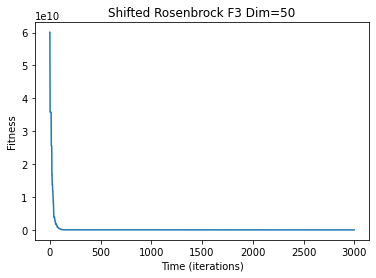

In [11]:
plt.plot(curve)
plt.title("Shifted Rosenbrock F3 Dim=50")
plt.xlabel("Time (iterations)")
plt.ylabel("Fitness")
plt.show()